<h2>RandomForest


In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [65]:
x,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [66]:
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.769097,-1.014117,0.746151,0.779604,0.502952,0
1,-1.987850,-0.803312,0.068964,-0.199504,-0.910315,1
2,-1.859285,-2.456166,3.798186,-1.676145,-0.807889,0
3,-0.264655,1.195526,0.496519,-2.969174,-1.727487,1
4,0.356046,-0.593157,1.366327,-0.434583,-1.818754,1


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [69]:
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [70]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [71]:
sample_rows(df,0.10)

,col1,col2,col3,col4,col5,target
24,-1.828940,-0.994296,0.816450,-0.755447,-1.583252,1
96,-3.489176,-0.348360,0.983755,0.205383,0.898971,0
89,-2.999753,-0.734751,1.165830,1.523796,1.484081,0
7,0.471537,-0.306672,2.689604,2.027257,3.564539,0
0,-1.769097,-1.014117,0.746151,0.779604,0.502952,0
89,-2.999753,-0.734751,1.165830,1.523796,1.484081,0
62,-2.152062,-0.157247,0.133069,0.648150,1.297015,0
72,-0.881479,0.317749,0.410288,-1.714610,-1.517979,1
35,-0.586525,-2.149821,1.933743,-1.159549,-0.090004,1
63,0.045199,-0.847530,0.681861,-0.006306,0.497760,0


In [72]:
sample_features(df,0.50)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13680\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col5,col3,target
0,0.502952,0.746151,0
1,-0.910315,0.068964,1
2,-0.807889,3.798186,0
3,-1.727487,0.496519,1
4,-1.818754,1.366327,1
...,...,...,...
95,-1.252798,0.855534,1
96,0.898971,0.983755,0
97,0.835842,1.323210,0
98,0.336943,1.426936,1


In [73]:
df1 = sample_rows(df,0.5)

In [74]:
df2 = sample_rows(df,0.5)

In [75]:
df3 = sample_rows(df,0.5)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [78]:
clf1.fit(df.iloc[:,0:5],df.iloc[:,-1])
clf2.fit(df.iloc[:,0:5],df.iloc[:,-1])
clf3.fit(df.iloc[:,0:5],df.iloc[:,-1])

DecisionTreeClassifier()

In [79]:
from sklearn.tree import plot_tree

[Text(0.6323529411764706, 0.9166666666666666, 'x[3] <= 0.226\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.38235294117647056, 0.75, 'x[4] <= -0.146\ngini = 0.293\nsamples = 56\nvalue = [10, 46]'),
 Text(0.5073529411764706, 0.8333333333333333, 'True  '),
 Text(0.23529411764705882, 0.5833333333333334, 'x[2] <= 2.992\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.17647058823529413, 0.4166666666666667, 'x[2] <= 0.256\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(0.11764705882352941, 0.25, 'x[2] <= 0.241\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.29411764705882354, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5294117647058824, 0.5833333333333334, 'x[1] <= -0.982\ngini

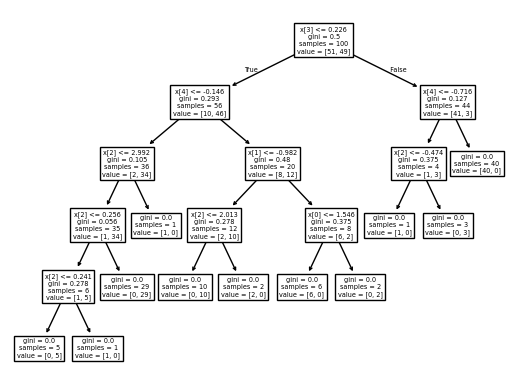

In [80]:
plot_tree(clf1)

[Text(0.6029411764705882, 0.9166666666666666, 'x[3] <= 0.226\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3235294117647059, 0.75, 'x[4] <= -0.146\ngini = 0.293\nsamples = 56\nvalue = [10, 46]'),
 Text(0.4632352941176471, 0.8333333333333333, 'True  '),
 Text(0.11764705882352941, 0.5833333333333334, 'x[1] <= -2.253\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.058823529411764705, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'x[2] <= 0.256\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(0.11764705882352941, 0.25, 'x[2] <= 0.241\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.5294117647058824, 0.5833333333333334, 'x[1] <= -0.982\ngin

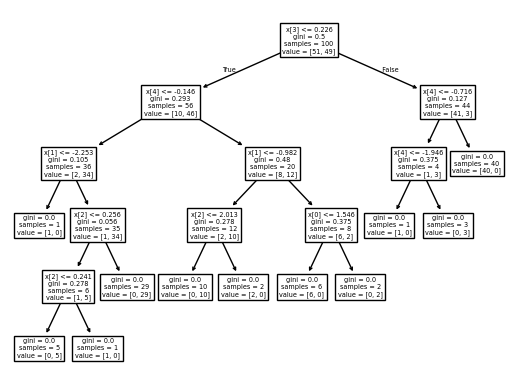

In [81]:
plot_tree(clf2)

[Text(0.6323529411764706, 0.9166666666666666, 'x[3] <= 0.226\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.38235294117647056, 0.75, 'x[4] <= -0.146\ngini = 0.293\nsamples = 56\nvalue = [10, 46]'),
 Text(0.5073529411764706, 0.8333333333333333, 'True  '),
 Text(0.23529411764705882, 0.5833333333333334, 'x[2] <= 2.992\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.17647058823529413, 0.4166666666666667, 'x[2] <= 0.256\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(0.11764705882352941, 0.25, 'x[0] <= -1.307\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.29411764705882354, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5294117647058824, 0.5833333333333334, 'x[1] <= -0.982\ngin

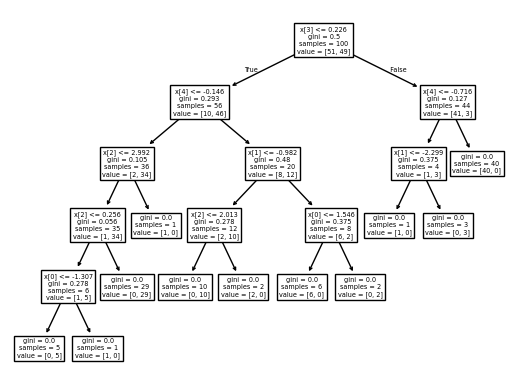

In [82]:
plot_tree(clf3)

In [83]:
clf1.predict(np.array([-1.828940,-0.994296,0.816450,-0.755447,-1.583252]).reshape(1,5))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [84]:

clf1.predict(np.array([-3.489176,-0.348360,0.983755,0.205383,0.898971]).reshape(1,5))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [85]:

clf2.predict(np.array([-3.489176,-0.348360,0.983755,0.205383,0.898971]).reshape(1,5))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [86]:

clf3.predict(np.array([-3.489176,-0.348360,0.983755,0.205383,0.898971]).reshape(1,5))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [87]:
df11 = sample_features(df,0.8)
df12 = sample_features(df,0.8)
df13 = sample_features(df,0.8)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13680\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Admin\AppData\Local\Temp\ipykernel_13680\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Admin\AppData\Local\Temp\ipykernel_13680\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [92]:
clf1.fit(df.iloc[:,0:4],df.iloc[:,-1])
clf2.fit(df.iloc[:,0:4],df.iloc[:,-1])
clf3.fit(df.iloc[:,0:4],df.iloc[:,-1])

DecisionTreeClassifier()

In [93]:
print(clf1.predict(np.array([-3.489176,-0.348360,0.983755,0.205383]).reshape(1,4)))
print(clf2.predict(np.array([-3.489176,-0.348360,0.983755,0.205383]).reshape(1,4)))
print(clf3.predict(np.array([-3.489176,-0.348360,0.983755,0.205383]).reshape(1,4)))

[0]
[0]
[0]


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
